## Problem 1
## Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign. 

### Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("austo_automobile+%282%29+%281%29.csv")

## A. What is the important technical information about the dataset that a database administrator would be interested in?

In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


As we can see Gender and Partner_salary have some null values. Data type is as per column's data is matching so there will be no special character to be replace.

In [6]:
df.shape

(1581, 14)

In [7]:
df.describe(include='all')

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1581.000000,1528,1581,1581,1581,1581.000000,1581,1581,1581,1581.000000,1475.000000,1581.000000,1581.000000,1581
unique,NaN,4,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3
top,NaN,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,1199,896,1443,985,NaN,792,1054,868,NaN,NaN,NaN,NaN,702
mean,31.922201,NaN,NaN,NaN,NaN,2.457938,NaN,NaN,NaN,60392.220114,20225.559322,79625.996205,35597.722960,NaN
std,8.425978,NaN,NaN,NaN,NaN,0.943483,NaN,NaN,NaN,14674.825044,19573.149277,25545.857768,13633.636545,NaN
min,22.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,18000.000000,NaN
25%,25.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,51900.000000,0.000000,60500.000000,25000.000000,NaN
50%,29.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,59500.000000,25600.000000,78000.000000,31000.000000,NaN
75%,38.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,71800.000000,38300.000000,95900.000000,47000.000000,NaN


In [9]:
#here we can see that in gender column the unique values are 4 instead of 2 

## B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data?

In [8]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

Gender has 53 null values and Partner_salary have 106 null values.

In [9]:
df.duplicated().sum()


0

In [10]:
df.nunique()

Age                  33
Gender                4
Profession            2
Marital_status        2
Education             2
No_of_Dependents      5
Personal_loan         2
House_loan            2
Partner_working       2
Salary              538
Partner_salary      149
Total_salary        754
Price                53
Make                  3
dtype: int64

In [11]:
df.columns
df_list=list(df[['Gender', 'Profession', 'Marital_status', 'Education',
        'Personal_loan', 'House_loan', 'Partner_working', 'Make']])
df_list

['Gender',
 'Profession',
 'Marital_status',
 'Education',
 'Personal_loan',
 'House_loan',
 'Partner_working',
 'Make']

In [12]:
for i in df_list:
    print(df[i].value_counts())

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64
Salaried    896
Business    685
Name: Profession, dtype: int64
Married    1443
Single      138
Name: Marital_status, dtype: int64
Post Graduate    985
Graduate         596
Name: Education, dtype: int64
Yes    792
No     789
Name: Personal_loan, dtype: int64
No     1054
Yes     527
Name: House_loan, dtype: int64
Yes    868
No     713
Name: Partner_working, dtype: int64
Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64


As we can see gender have 4 unique values due to th spelling mistake. So we will replace the data with correct spelling.

In [13]:
df['Gender']=df['Gender'].replace('Femal', 'Female')
df['Gender']=df['Gender'].replace('Femle', 'Female')

In [14]:
df['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [15]:
df['Gender'].mode()

0    Male
dtype: object

In [16]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [17]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

C:\Users\Gulshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Partner_salary'>

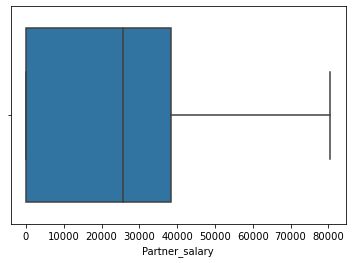

In [18]:
sns.boxplot(df['Partner_salary'])

As we can see there is no outliers so will replace the null values with mean.

In [19]:
df['Partner_salary']=df['Total_salary']-df['Salary']

In [20]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

C:\Users\Gulshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gulshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gulshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gulshan\anaconda

<AxesSubplot:xlabel='Price'>

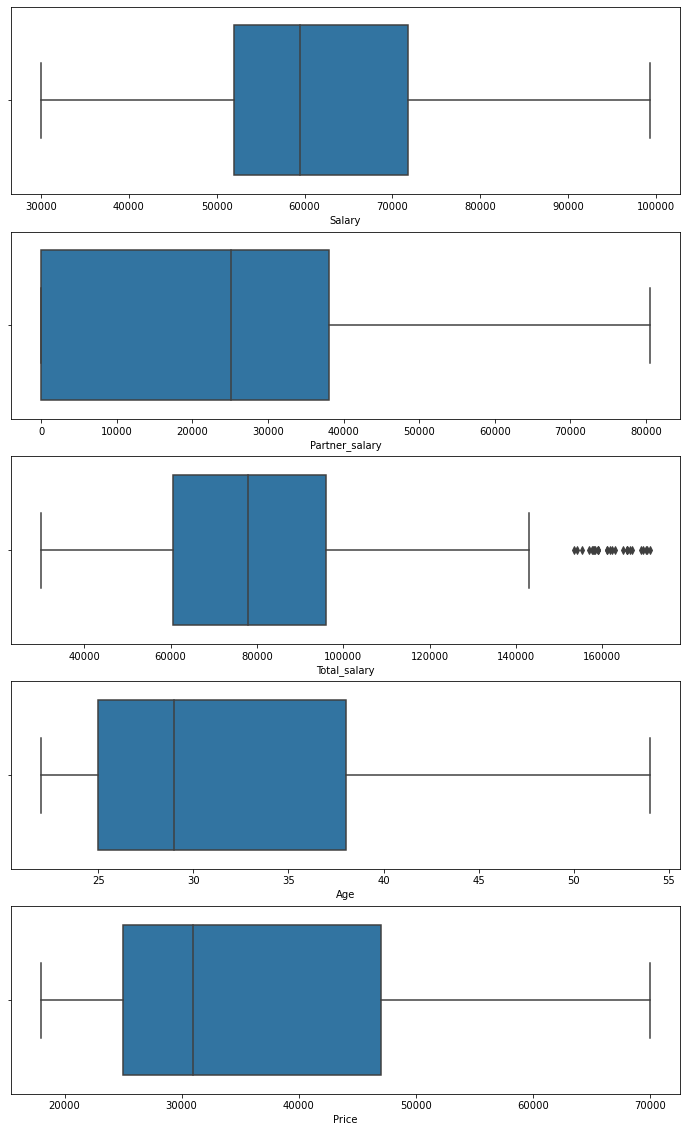

In [21]:
fig, axes=plt.subplots(nrows=5)
fig.set_size_inches(12,20)
sns.boxplot(df['Salary'], ax=axes[0] )
sns.boxplot(df['Partner_salary'], ax=axes[1])
sns.boxplot(df['Total_salary'], ax=axes[2])
sns.boxplot(df['Age'], ax=axes[3])
sns.boxplot(df['Price'], ax=axes[4])


In [22]:
df['Total_salary'].describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

In [23]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(IQR*1.5)
    upper_range=Q3+(IQR*1.5)
    return lower_range, upper_range

In [24]:
lower_point,upper_point=remove_outliers(df['Total_salary'])

In [25]:
df['Total_salary']=df['Total_salary'].apply(lambda x: upper_point if x>upper_point else x)

In [26]:
df['Total_salary'].describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64

## C) Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

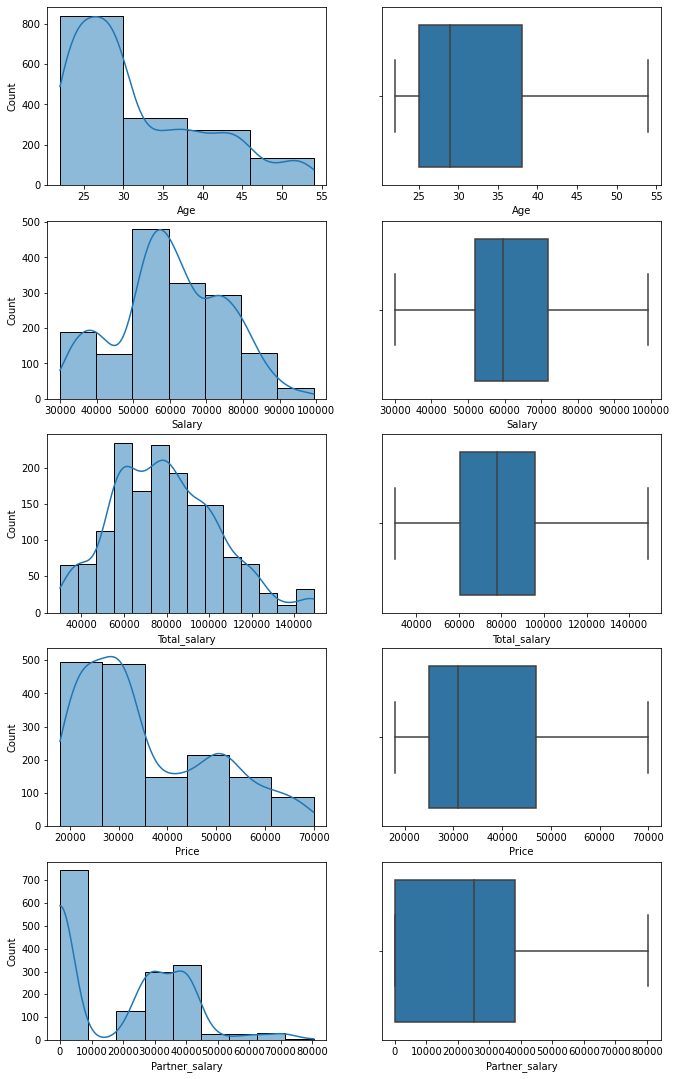

In [27]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_size_inches(11,19)
sns.histplot(df['Age'], bins = 4, kde = True, ax = axes[0][0])
sns.boxplot(data = df, x = 'Age', ax = axes[0][1])
sns.histplot(df['Salary'], bins = 7, kde = True, ax = axes[1][0])
sns.boxplot(data = df, x = 'Salary', ax = axes[1][1])
sns.histplot(df['Total_salary'], bins = 14, kde = True, ax = axes[2][0])
sns.boxplot(data = df, x = 'Total_salary', ax = axes[2][1])
sns.histplot(df['Price'], bins = 6, kde = True, ax = axes[3][0])
sns.boxplot(data = df, x = 'Price', ax = axes[3][1])
sns.histplot(df['Partner_salary'], bins = 9, kde = True, ax = axes[4][0])
sns.boxplot(data = df, x = 'Partner_salary', ax = axes[4][1])
plt.show()

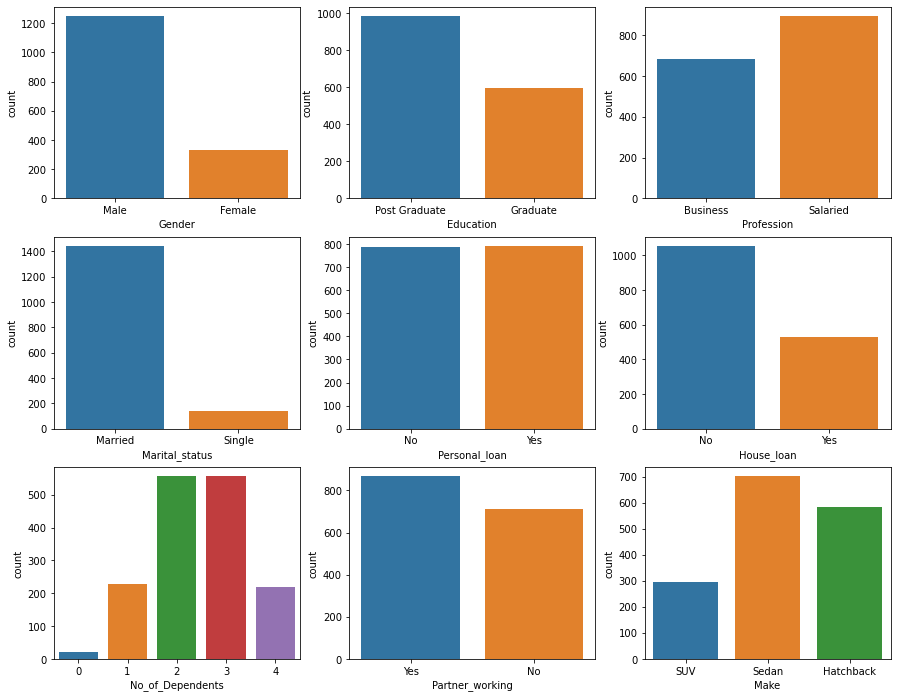

In [28]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.set_size_inches(15,12)
sns.countplot(data = df, x = 'Gender', ax = axes[0][0])
sns.countplot(data = df, x = 'Education', ax = axes[0][1])
sns.countplot(data = df, x = 'Profession', ax = axes[0][2])
sns.countplot(data = df, x = 'Marital_status', ax = axes[1][0])
sns.countplot(data = df, x = 'Personal_loan', ax = axes[1][1])
sns.countplot(data = df, x = 'House_loan', ax = axes[1][2])
sns.countplot(data = df, x = 'No_of_Dependents', ax = axes[2][0])
sns.countplot(data = df, x = 'Partner_working', ax = axes[2][1])
sns.countplot(data = df, x = 'Make', ax = axes[2][2])
plt.show()

## D) Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.

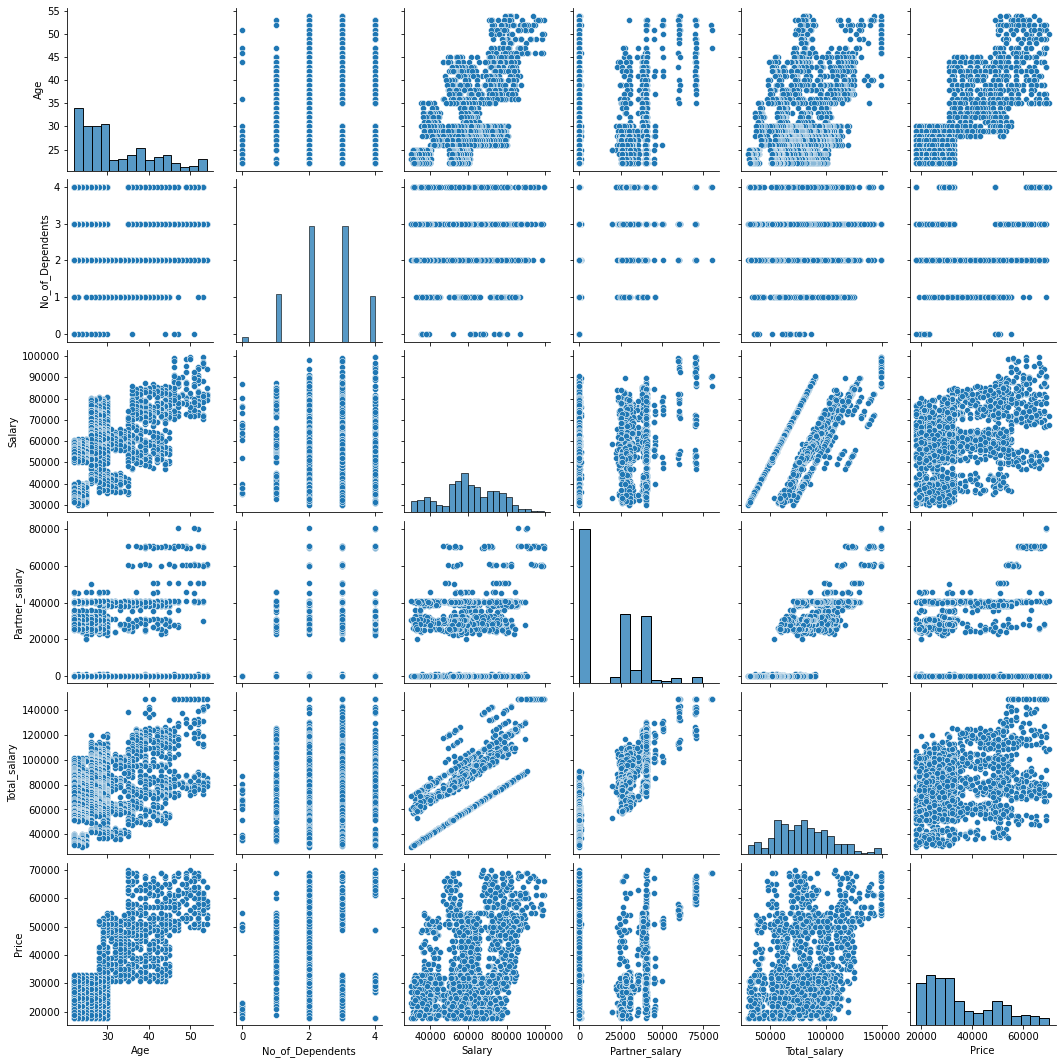

In [29]:
sns.pairplot(data=df)

In [30]:
df.columns
df_num=df[['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price' ]]

<AxesSubplot:>

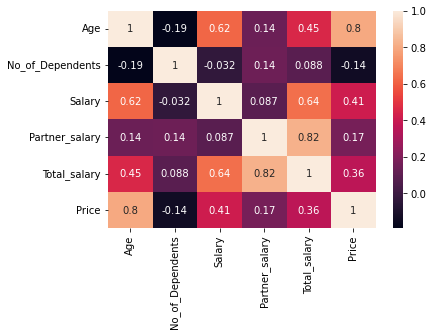

In [31]:
sns.heatmap(df_num.corr(), annot=True)

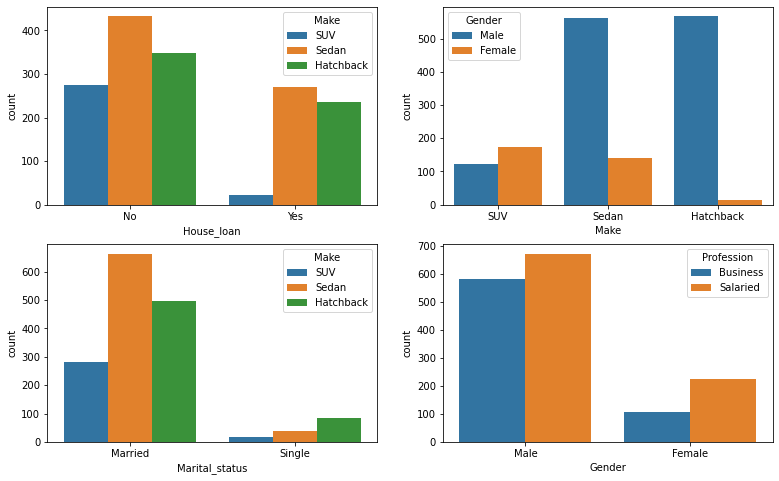

In [32]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(13,8)
sns.countplot(data = df, x = 'House_loan', hue = 'Make', ax = axes[0][0])
sns.countplot(data = df, x = 'Make', hue = 'Gender', ax = axes[0][1])
sns.countplot(data = df, x = 'Marital_status', hue = 'Make', ax = axes[1][0])
sns.countplot(data = df, x = 'Gender', hue = 'Profession', ax = axes[1][1])
plt.show()

## E) Employees working on the existing marketing campaign have made the following remarks.
## Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.¶
## E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

In [35]:
df_male=df[(df["Gender"]=="Male")]
df_female=df[(df["Gender"]=="Female")]

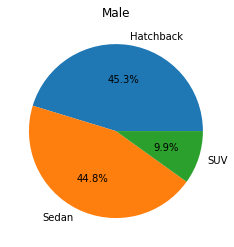

In [36]:
plt.title("Male")
plt.pie(df_male['Make'].value_counts(), labels= df_male['Make'].value_counts().index, autopct='%1.1f%%')
plt.show()

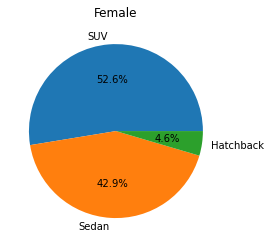

In [37]:
plt.title("Female")
plt.pie(df_female['Make'].value_counts(), labels= df_female['Make'].value_counts().index, autopct='%1.1f%%')
plt.show()

## E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

In [38]:
df_sal=df[df['Profession']=='Salaried']
df_bus=df[df['Profession']=='Business']

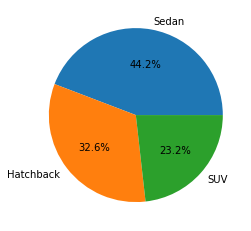

Salaried


In [39]:
plt.pie(df_sal['Make'].value_counts(), labels= df_sal['Make'].value_counts().index, autopct='%1.1f%%')
plt.show()
print('Salaried')

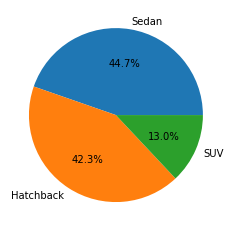

Business


In [40]:
plt.pie(df_bus['Make'].value_counts(), labels= df_bus['Make'].value_counts().index, autopct='%1.1f%%')
plt.show()
print('Business')

## E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

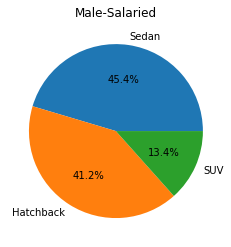

In [47]:
plt.title("Male-Salaried")
plt.pie(df_sal[df_sal['Gender']=='Male']['Make'].value_counts(), labels= df_sal[df_sal['Gender']=='Male']['Make'].value_counts().index, autopct='%1.1f%%')
plt.show()

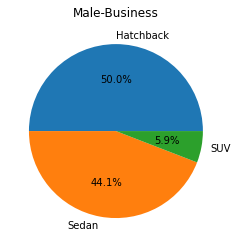

In [48]:
plt.title("Male-Business")
plt.pie(df_bus[df_bus['Gender']=='Male']['Make'].value_counts(), labels= df_bus[df_bus['Gender']=='Male']['Make'].value_counts().index, autopct='%1.1f%%')
plt.show()

## F) From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.
## Give justification along with presenting metrics/charts used for arriving at the conclusions.
## F1) Gender

Mean Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64 

 Median Gender
Female    49000.0
Male      29000.0
Name: Price, dtype: float64


<AxesSubplot:xlabel='Gender', ylabel='Price'>

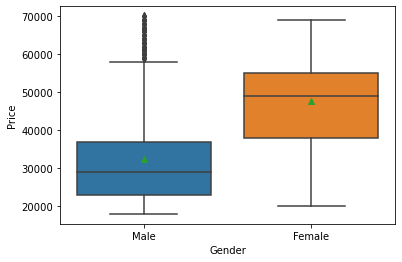

In [50]:
print('Mean', df.groupby(by = df['Gender']).Price.mean(), '\n\n', 'Median',
     df.groupby(by=df['Gender']).Price.median())
sns.boxplot(data=df,x='Gender',y='Price',showmeans=True)

## F2) Personal_loan

Mean Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64 

 Median Personal_loan
No     32000.0
Yes    31000.0
Name: Price, dtype: float64


<AxesSubplot:xlabel='Personal_loan', ylabel='Price'>

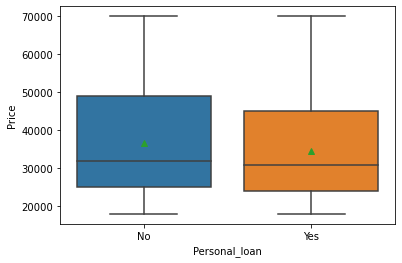

In [51]:
print('Mean', df.groupby(by = df['Personal_loan']).Price.mean(), '\n\n', 'Median',
     df.groupby(by=df['Personal_loan']).Price.median())
sns.boxplot(data=df,x='Personal_loan',y='Price',showmeans=True)

## G) From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64 
 Partner_working
No     31000.0
Yes    31000.0
Name: Price, dtype: float64


<AxesSubplot:xlabel='Partner_working', ylabel='Price'>

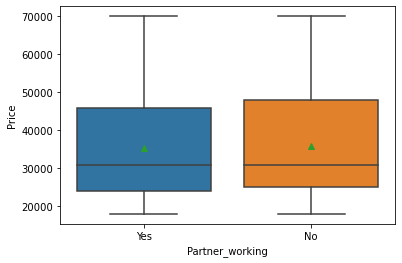

In [52]:
print(df.groupby(by = df['Partner_working']).Price.mean(), '\n',
df.groupby(by = df['Partner_working']).Price.median())
sns.boxplot(data=df,x='Partner_working',y='Price',showmeans=True)

## H) The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

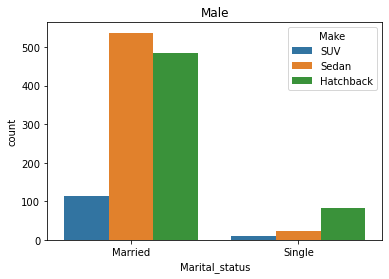

In [53]:
plt.title("Male")
sns.countplot(data=df_male, x='Marital_status', hue='Make')
plt.show()

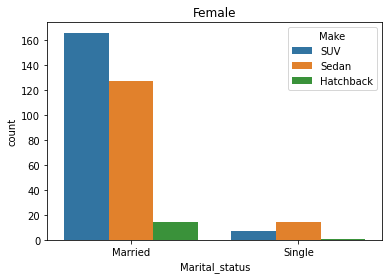

In [54]:
plt.title("Female")
sns.countplot(data = df_female, x = 'Marital_status', hue = 'Make')
plt.show()